<a href="https://colab.research.google.com/github/simsekergun/DATA601/blob/main/Project2/DATA601_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DATA 601 Project
Due date: May 19, 2022. 23:59 pm.<br>
Groups will be determined at the April 29 class. <br>
<br>

For your second project, you will be working on the flights dataset that we used earlier. <br>
We have 5 csv files and 5 Excel files. You can learn more about the content of the csv files at <br>
https://cran.r-project.org/web/packages/nycflights13/nycflights13.pdf
<br>
<br>
<b> </b>Files:::
* flights2DCMDVA.xlsx  <br>
* airlines.csv <br>
* airports.csv <br>
* planes.csv <br>
* weatherNYhourly.csv (NY daily weather)<br>
* weatherMDdaily.xlsx (MD daily temperature/precip/snow data) <br>
* weatherNYdaily.xlsx (NY daily temperature/precip/snow data) <br>
* federal-holidays-2013.xlsx <br>
* flights_test_data.xlsx (only needed for Q4 and Q5)<br>

We are only interested in flights from NY to three local airports:
* IAD: Dulles International Airport
* BWI: Baltimore/Washington International Thurgood Marshall Airport
* DCA: Ronald Reagan Washington National Airport

After carrying out EAD, please work on the following questions. You will need to submit your notebook and report (as a pdf file). <br> 
The report should include
* Names of the students, Title of the project (e.g. DATA 601 | Project 2| NY-DC/MD/VA Flights), and date
* A brief introduction
* Clear answers to the questions. Make sure that you have enough number of images with proper figure captions and numbering.

#### Answer the following questions or complete the tasks <br>

#### Question/Task 1
a. Calculate the total number of seats for all the planned flights for each destination separately? <br>
b. What is the day of the year with the highest number of flights? <br>
c. What is the day of the year with the highest number of seats available on that day? <br>

#### Question/Task 2
a. What day of the year most cancellations happened? <br>
b. Is there any relationship between the weather datasets and cancellations? If yes, describe it and justify with a statistical model (hypothesis testing).<br>
c. Is there any relationship between the Federal Holiday Schedule and cancellations? If yes, describe it and justify with a statistical model (hypothesis testing).<br>
d. What is the total number of seats for the cancelled flights? If we assume the average flight price of $50, what is the total economis loss?<br>
e. Determine the ratio of cancelled flights/planned flights for each airline company, list it, and determine the most and least reliable airline company (most reliable = the one that has the smallest ratio of cancelled/planned)<br>


For the next group of questions/tasks, do not include the cancelled flights.

#### Question/Task 3
a. Calculate the average arrival delay for all the flights that took place in the same day and plot it (x = 1:365, y = daily average delay). On the same plot, please mark the Federal Holidays from the federal-holidays-2013.xlsx dataset.<br>
b. Is there a correlation between the weather datasets and daily average arrival delay? Justify your answer with a statistical model (hypothesis testing)<br>
c. Is there a correlation between the Federal Holiday Schedule and daily average arrival delay?<br>
d. Calculate the average arrival delay for all the flights for each arrival airport (e.g. IAD, DCA, and BWI) and determine most and least reliables (most reliable = the one that has the shortest average delay)<br>
e. Calculate the average arrival delay for all the airlines and determine most and least reliables (most reliable = the one that has the shortest average delay) <br>
f. What day of the week we had the highest average delay?<br>
g. Which one had a higher average delay: flights that took off in the morning (6 am to 10 am), noon (11 am to 2 pm), afternoon (3 pm to 5pm), or evening (6 pm to 10 pm)?<br>
h. Determine the number of airplanes used in these flights manufactured by BOEING, EMBRAER, and AURBUS separately. <br>
<br>

#### Question/Task 4
Build a linear regression model to estimate the arrival delay of the flights given in "fligts_test_data.xlsx". Note that you have the full autorithy to decide what columns, what datasets (among the given datasets) to work with. In your report, please explain how you build the LR model and eloborate on its accuracy. 

#### Question/Task 5
Build a logistic regression model to guess the 3 cancelled flights given in "fligts_test_data.xlsx". Again, you have the full autorithy to decide what columns, what datasets (among the given datasets) to work with. In your report, please explain how you build the LogReg model and eloborate on its accuracy.


# TASK1

In [ ]:
import pandas as pd
import math
flight_data=pd.read_csv('/content/flights2DCMDVA (1).csv')
plane_data=pd.read_csv('/content/planes.csv')
merged_data=pd.merge(flight_data,plane_data,how="left",on='tailnum')
merged_data.shape

(17166, 24)

## a.Calculate the total number of seats for all the planned flights for each destination separately?

In [ ]:
merged_data.groupby(['dest'])['seats'].sum().reset_index() ###Correct

,dest,seats
0,BWI,96135.0
1,DCA,906225.0
2,IAD,296004.0


In [ ]:
merged_data

,year_x,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,...,hour,minute,year_y,type,manufacturer,model,engines,seats,speed,engine
0,2013,1,1,629.0,-1.0,721.0,-19.0,WN,N273WN,4646,...,6.0,29.0,2007.0,Fixed wing multi engine,BOEING,737-7H4,2.0,140.0,NaN,Turbo-fan
1,2013,1,1,848.0,853.0,1001.0,851.0,MQ,N942MQ,3944,...,8.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,1,1,1059.0,-1.0,1201.0,-14.0,WN,N505SW,321,...,10.0,59.0,1990.0,Fixed wing multi engine,BOEING,737-5H4,2.0,149.0,NaN,Turbo-jet
3,2013,1,1,1158.0,-2.0,1256.0,-4.0,WN,N783SW,1568,...,11.0,58.0,2000.0,Fixed wing multi engine,BOEING,737-7H4,2.0,140.0,NaN,Turbo-fan
4,2013,1,1,1316.0,2.0,1412.0,-3.0,EV,N11551,4340,...,13.0,16.0,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2.0,55.0,NaN,Turbo-fan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17161,2013,12,31,1105.0,53.0,1211.0,36.0,EV,N835AS,5769,...,11.0,5.0,1998.0,Fixed wing multi engine,BOMBARDIER INC,CL-600-2B19,2.0,55.0,NaN,Turbo-fan
17162,2013,12,31,1406.0,0.0,1534.0,8.0,EV,N826AS,5712,...,14.0,6.0,1997.0,Fixed wing multi engine,CANADAIR,CL-600-2B19,2.0,55.0,NaN,Turbo-fan
17163,2013,12,31,1430.0,-2.0,1546.0,-9.0,YV,N515MJ,3771,...,14.0,30.0,2003.0,Fixed wing multi engine,BOMBARDIER INC,CL-600-2C10,2.0,80.0,NaN,Turbo-fan
17164,2013,12,31,1447.0,-7.0,1604.0,-27.0,9E,N8477R,2946,...,14.0,47.0,2001.0,Fixed wing multi engine,BOMBARDIER INC,CL-600-2B19,2.0,55.0,NaN,Turbo-fan


## b.What is the day of the year with the highest number of flights?

In [ ]:
merged_data['day_of_year']=merged_data.apply(lambda x:str(x['month'])+'-'+str(x['day']),axis=1)
merged_data.groupby(['day_of_year'])['flight'].count().reset_index().sort_values(by='flight',ascending=False)[0:2]
## 11th day of 1st month has the highest numbr of flights

,day_of_year,flight
2,1-11,61
8,1-17,61


## c.What is the day of the year with the highest number of seats available on that day?


In [ ]:
merged_data_temp=merged_data
merged_data.groupby(['day_of_year'])['seats'].sum().reset_index().sort_values(by='seats',ascending=False)[0:1]
## 28th day of 2nd month has the highest numbr of flights


,day_of_year,seats
143,2-28,5379.0


# Task 2

## a. What day of the year most cancellations happened?

In [ ]:
cancelled_data=merged_data[merged_data.dep_time.isna()].fillna('cancelled').groupby(['day_of_year'])['dep_time'].count().reset_index().sort_values(by='dep_time',ascending=False)
cancelled_data[0:1]
#  6th day of 3rd month highest no of cancellations happened

,day_of_year,dep_time
110,3-6,46


## b. Is there any relationship between the weather datasets and cancellations? If yes, describe it and justify with a statistical model (hypothesis testing).

In [ ]:
weather_data_md=pd.read_excel('/content/weatherMDdaily.xlsx')
weather_data_ny=pd.read_excel('/content/weatherNYdaily.xlsx')

In [ ]:
weather_data_md

,Date,Max Temp,Min Temp,Precipitation,Snowfall,Snow Depth
0,2013-01-01,44,34,0,0,0
1,2013-01-02,37,26,0,0,0
2,2013-01-03,38,22,0,0,0
3,2013-01-04,42,23,0,0,0
4,2013-01-05,43,31,T,0,0
...,...,...,...,...,...,...
360,2013-12-27,49,22,0,0,0
361,2013-12-28,58,28,0,0,0
362,2013-12-29,47,39,1.09,0,0
363,2013-12-30,47,32,0,0,0


In [ ]:
merged_data['date']=merged_data.apply(lambda x:str(x['year_x'])+'-'+str(x['month'])+'-'+str(x['day']), axis =1)
merged_data['date']=pd.to_datetime(merged_data['date'])
merged_data['cancellation']=merged_data['dep_time'].apply(lambda x: 1 if math.isnan(x) else 0)

In [ ]:
date_wise_cancelaltion=merged_data.groupby(['date'])['cancellation'].sum().reset_index().sort_values(by='cancellation',ascending=False)

In [ ]:
merged_temp_cancellation_data=pd.merge(date_wise_cancelaltion,weather_data_md,left_on='date',right_on='Date')

In [ ]:
merged_temp_cancellation_data

,date,cancellation,Date,Max Temp,Min Temp,Precipitation,Snowfall,Snow Depth
0,2013-03-06,46,2013-03-06,40,33,0.75,T,T
1,2013-02-08,33,2013-02-08,42,33,0.24,0,0
2,2013-09-12,25,2013-09-12,89,70,0.65,0,0
3,2013-03-08,23,2013-03-08,49,33,0,0,0
4,2013-05-23,21,2013-05-23,80,65,0.99,0,0
...,...,...,...,...,...,...,...,...
360,2013-07-04,0,2013-07-04,88,73,T,0,0
361,2013-07-05,0,2013-07-05,89,74,0,0,0
362,2013-07-15,0,2013-07-15,95,72,0,0,0
363,2013-07-16,0,2013-07-16,95,75,0,0,0


In [ ]:
merged_temp_cancellation_data['Precipitation']=merged_temp_cancellation_data['Precipitation'].replace('T',0)
merged_temp_cancellation_data['Snowfall']=merged_temp_cancellation_data['Snowfall'].replace('T',0)
merged_temp_cancellation_data['Snow Depth']=merged_temp_cancellation_data['Snow Depth'].replace('T',0)

In [ ]:
# hypothesis: there is a correlation between weather and cancellation
from scipy.stats import pearsonr
corr, _= pearsonr(merged_temp_cancellation_data['Max Temp'], merged_temp_cancellation_data['cancellation'])
print('Pearsons correlation Max Temp: %.3f' % _)

corr, _ = pearsonr(merged_temp_cancellation_data['Min Temp'], merged_temp_cancellation_data['cancellation'])
print('Pearsons correlation Min Temp: %.3f' % _) 

corr, _ = pearsonr(merged_temp_cancellation_data['Precipitation'], merged_temp_cancellation_data['cancellation'])
print('Pearsons correlation Precipitation: %.3f' % _)

corr, _ = pearsonr(merged_temp_cancellation_data['Snowfall'], merged_temp_cancellation_data['cancellation'])
print('Pearsons correlation Snowfall: %.3f' % _)

corr, _ = pearsonr(merged_temp_cancellation_data['Snow Depth'], merged_temp_cancellation_data['cancellation'])
print('Pearsons correlation Snow Depth: %.3f' % _)

print("\nThe Precipitation and snowfall has an effect on flight cancellation while snow depth, min temp, max temp has no effect")

Pearsons correlation Max Temp: 0.977
Pearsons correlation Min Temp: 0.184
Pearsons correlation Precipitation: 0.000
Pearsons correlation Snowfall: 0.012
Pearsons correlation Snow Depth: 0.765

The Precipitation and snowfall has an effect on flight cancellation while snow depth, min temp, max temp has no effect


## c. Is there any relationship between the Federal Holiday Schedule and cancellations? If yes, describe it and justify with a statistical model (hypothesis testing).


In [ ]:
holiday_calendar=pd.read_excel('/content/federal-holidays-2013.xlsx')

In [ ]:
holiday_calendar.columns=['date','holiday','weekday']

In [ ]:
holiday_calendar=holiday_calendar[1:11]

In [ ]:
holiday_calendar['date']=pd.to_datetime(holiday_calendar['date'])

In [ ]:
holiday_calendar

,date,holiday,weekday
1,2013-01-01,New Year's Day,Tuesday
2,2013-01-21,Martin Luther King Day,Monday
3,2013-02-18,Presidents' Day,Monday
4,2013-05-27,Memorial Day,Monday
5,2013-07-04,Independence Day,Thursday
6,2013-09-02,Labor Day,Monday
7,2013-10-14,Columbus Day,Monday
8,2013-11-11,Veterans Day,Monday
9,2013-11-28,Thanksgiving Day,Thursday
10,2013-12-25,Christmas Day,Wednesday


In [ ]:
holiday_calendar_cancellations=pd.merge(holiday_calendar,merged_temp_cancellation_data,how='right')

In [ ]:
holiday_calendar_cancellations=holiday_calendar_cancellations.fillna(0)

In [ ]:
holiday_calendar_cancellations.loc[holiday_calendar_cancellations.holiday!=0,'holiday']=1

In [ ]:
holiday_calendar_cancellations

,date,holiday,weekday,cancellation,Date,Max Temp,Min Temp,Precipitation,Snowfall,Snow Depth
0,2013-03-06,0,0,46,2013-03-06,40,33,0.75,0.0,0
1,2013-02-08,0,0,33,2013-02-08,42,33,0.24,0.0,0
2,2013-09-12,0,0,25,2013-09-12,89,70,0.65,0.0,0
3,2013-03-08,0,0,23,2013-03-08,49,33,0.00,0.0,0
4,2013-05-23,0,0,21,2013-05-23,80,65,0.99,0.0,0
...,...,...,...,...,...,...,...,...,...,...
360,2013-07-04,1,Thursday,0,2013-07-04,88,73,0.00,0.0,0
361,2013-07-05,0,0,0,2013-07-05,89,74,0.00,0.0,0
362,2013-07-15,0,0,0,2013-07-15,95,72,0.00,0.0,0
363,2013-07-16,0,0,0,2013-07-16,95,75,0.00,0.0,0


In [ ]:
# hypothesis: there is no effect between holiday and cancellation
from scipy.stats import pearsonr
corr, _ = pearsonr(holiday_calendar_cancellations['holiday'], holiday_calendar_cancellations['cancellation'])
print('Pearsons correlation: %.3f' % _)

# there is no effect between holiday and cancellation

Pearsons correlation: 0.368


## d. What is the total number of seats for the cancelled flights? If we assume the average flight price of $50, what is the total economis loss?

In [ ]:
print('The total number of seats for the cancelled flights are: ',merged_data[merged_data['cancellation']==1]['seats'].sum())
print('The total economis loss is: ',merged_data[merged_data['cancellation']==1]['seats'].sum()*50,"dollars")

The total number of seats for the cancelled flights are:  24032.0
The total economis loss is:  1201600.0 dollars


## e.Determine the ratio of cancelled flights/planned flights for each airline company, list it, and determine the most and least reliable airline company (most reliable = the one that has the smallest ratio of cancelled/planned)

In [ ]:
airlines=pd.read_csv('/content/airlines.csv')

In [ ]:
merged_data_ratio=merged_data.groupby(['carrier','cancellation'])['year_x'].count().reset_index()

In [ ]:
merged_data_ratio

,carrier,cancellation,year_x
0,9E,0,2448
1,9E,1,144
2,B6,0,667
3,B6,1,8
4,DL,0,2
5,EV,0,5741
6,EV,1,369
7,MQ,0,2405
8,MQ,1,149
9,OO,0,1


In [ ]:
merged_data_ratio_sum=merged_data_ratio.groupby('carrier')['year_x'].sum().reset_index()

In [ ]:
merged_data_ratio_sum

,carrier,year_x
0,9E,2592
1,B6,675
2,DL,2
3,EV,6110
4,MQ,2554
5,OO,1
6,UA,3
7,US,4710
8,WN,208
9,YV,311


In [ ]:
merged_data_all=pd.merge(merged_data_ratio,merged_data_ratio_sum,how = "right", on='carrier')

In [ ]:
merged_data_all_1=merged_data_all[merged_data_all['cancellation']==1]

In [ ]:
merged_data_all_1

,carrier,cancellation,year_x_x,year_x_y
1,9E,1,144,2592
3,B6,1,8,675
6,EV,1,369,6110
8,MQ,1,149,2554
12,US,1,229,4710
14,WN,1,8,208
16,YV,1,32,311


In [ ]:
merged_data_all_2=merged_data_all[merged_data_all['cancellation']==0].reset_index()
merged_data_all_2= merged_data_all_2.iloc[[2,5,6]]
merged_data_all_2.drop("index", axis=1, inplace=True)


In [ ]:
merged_data_all_2["year_x_x"] = 0

In [ ]:
merged_data_all_2

,carrier,cancellation,year_x_x,year_x_y
2,DL,0,0,2
5,OO,0,0,1
6,UA,0,0,3


In [ ]:
list1 = [merged_data_all_1, merged_data_all_2]
merged_data_all_final = pd.concat(list1)

In [ ]:
merged_data_all_final

,carrier,cancellation,year_x_x,year_x_y
1,9E,1,144,2592
3,B6,1,8,675
6,EV,1,369,6110
8,MQ,1,149,2554
12,US,1,229,4710
14,WN,1,8,208
16,YV,1,32,311
2,DL,0,0,2
5,OO,0,0,1
6,UA,0,0,3


In [ ]:
merged_data_all_final.columns=['carrier','cancellation','ind','all']

In [ ]:
merged_data_all_final

,carrier,cancellation,ind,all
1,9E,1,144,2592
3,B6,1,8,675
6,EV,1,369,6110
8,MQ,1,149,2554
12,US,1,229,4710
14,WN,1,8,208
16,YV,1,32,311
2,DL,0,0,2
5,OO,0,0,1
6,UA,0,0,3


In [ ]:
merged_data_all_final['ratio']=merged_data_all_final['ind']/merged_data_all_final['all']

In [ ]:
airlines

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.
5,EV,ExpressJet Airlines Inc.
6,F9,Frontier Airlines Inc.
7,FL,AirTran Airways Corporation
8,HA,Hawaiian Airlines Inc.
9,MQ,Envoy Air


In [ ]:
merged_data_all_final
# the most trusted airlines are 9E(Endeavor Air Inc.), DL(Delta Air Lines Inc.), OO(SkyWest Airlines Inc.), UAUnited Air Lnes Inc.), US(US Airways Inc.)

,carrier,cancellation,ind,all,ratio
1,9E,1,144,2592,0.055556
3,B6,1,8,675,0.011852
6,EV,1,369,6110,0.060393
8,MQ,1,149,2554,0.058340
12,US,1,229,4710,0.048620
14,WN,1,8,208,0.038462
16,YV,1,32,311,0.102894
2,DL,0,0,2,0.000000
5,OO,0,0,1,0.000000
6,UA,0,0,3,0.000000


# Task 3

## a. Calculate the average arrival delay for all the flights that took place in the same day and plot it (x = 1:365, y = daily average delay). On the same plot, please mark the Federal Holidays from the federal-holidays-2013.xlsx dataset.

In [ ]:
plot_1_data=merged_data_temp.groupby('date')['arr_delay'].mean().reset_index()

In [ ]:
plot_1_data['day_of_year']=plot_1_data['date'].apply(lambda x:x.timetuple().tm_yday)

In [ ]:
plot_1_data

,date,arr_delay,day_of_year
0,2013-01-01,34.075000,1
1,2013-01-02,23.702128,2
2,2013-01-03,8.040816,3
3,2013-01-04,5.326531,4
4,2013-01-05,-8.538462,5
...,...,...,...
360,2013-12-27,2.090909,361
361,2013-12-28,1.272727,362
362,2013-12-29,26.740741,363
363,2013-12-30,-5.275862,364


In [ ]:
holiday_calendar

,date,holiday,weekday
1,2013-01-01,New Year's Day,Tuesday
2,2013-01-21,Martin Luther King Day,Monday
3,2013-02-18,Presidents' Day,Monday
4,2013-05-27,Memorial Day,Monday
5,2013-07-04,Independence Day,Thursday
6,2013-09-02,Labor Day,Monday
7,2013-10-14,Columbus Day,Monday
8,2013-11-11,Veterans Day,Monday
9,2013-11-28,Thanksgiving Day,Thursday
10,2013-12-25,Christmas Day,Wednesday


In [ ]:
plot_data=pd.merge(plot_1_data,holiday_calendar,on='date',how='left')
plot_data=plot_data.fillna(0)
plot_data.loc[plot_data.holiday!=0,'holiday']=1

In [ ]:
plot_data["holiday"] = plot_data["holiday"].astype('int')
plot_data

,date,arr_delay,day_of_year,holiday,weekday
0,2013-01-01,34.075000,1,1,Tuesday
1,2013-01-02,23.702128,2,0,0
2,2013-01-03,8.040816,3,0,0
3,2013-01-04,5.326531,4,0,0
4,2013-01-05,-8.538462,5,0,0
...,...,...,...,...,...
360,2013-12-27,2.090909,361,0,0
361,2013-12-28,1.272727,362,0,0
362,2013-12-29,26.740741,363,0,0
363,2013-12-30,-5.275862,364,0,0


In [ ]:
plot_data.drop(columns=['weekday','date'],inplace=True)

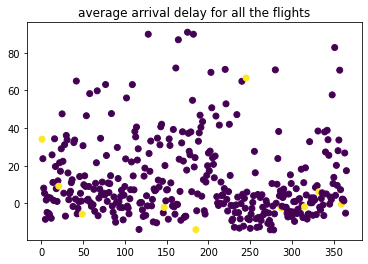

In [ ]:
import matplotlib.pyplot as plt 
plt.scatter(plot_data['day_of_year'], plot_data['arr_delay'], c =plot_data['holiday'])
 
# To show the plot
plt.title('average arrival delay for all the flights')
plt.show()


## b. Is there a correlation between the weather datasets and daily average arrival delay? 


In [ ]:
plot_data_correlations_weather=pd.merge(plot_1_data,weather_data_md,left_on='date',right_on='Date',how='left')
plot_data_correlations_weather['Precipitation']=plot_data_correlations_weather['Precipitation'].replace('T',0)
plot_data_correlations_weather['Snowfall']=plot_data_correlations_weather['Snowfall'].replace('T',0)
plot_data_correlations_weather['Snow Depth']=plot_data_correlations_weather['Snow Depth'].replace('T',0)
plot_data_correlations_weather.corr()
# there is a little corrleation between precipitation and arrival delay which is 0.3 
# so we can say there is little correlation between weather datasets and daily average arrivale delay.

,arr_delay,day_of_year,Max Temp,Min Temp,Precipitation,Snowfall,Snow Depth
arr_delay,1.000000,-0.087826,0.051003,0.172477,0.376755,0.137704,0.101120
day_of_year,-0.087826,1.000000,0.226541,0.206067,0.046919,-0.043792,-0.051856
Max Temp,0.051003,0.226541,1.000000,0.933514,-0.002687,-0.207904,-0.261180
Min Temp,0.172477,0.206067,0.933514,1.000000,0.094914,-0.147471,-0.221124
Precipitation,0.376755,0.046919,-0.002687,0.094914,1.000000,0.106251,0.037556
Snowfall,0.137704,-0.043792,-0.207904,-0.147471,0.106251,1.000000,0.646871
Snow Depth,0.101120,-0.051856,-0.261180,-0.221124,0.037556,0.646871,1.000000


In [ ]:
from scipy.stats import pearsonr
corr, _= pearsonr(plot_data_correlations_weather['Max Temp'], plot_data_correlations_weather['arr_delay'])
print('Pearsons correlation Max Temp: %.3f' % _)

corr, _ = pearsonr(plot_data_correlations_weather['Min Temp'], plot_data_correlations_weather['arr_delay'])
print('Pearsons correlation Min Temp: %.3f' % _) 

corr, _ = pearsonr(plot_data_correlations_weather['Precipitation'], plot_data_correlations_weather['arr_delay'])
print('Pearsons correlation Precipitation: %.3f' % _)

corr, _ = pearsonr(plot_data_correlations_weather['Snowfall'], plot_data_correlations_weather['arr_delay'])
print('Pearsons correlation Snowfall: %.3f' % _)

corr, _ = pearsonr(plot_data_correlations_weather['Snow Depth'], plot_data_correlations_weather['arr_delay'])
print('Pearsons correlation Snow Depth: %.3f' % _)

print("\nThe Min temp, Precipitation and snow fall has effect on arrival delay. while max temp, snow depth doesn't have any effect")

Pearsons correlation Max Temp: 0.331
Pearsons correlation Min Temp: 0.001
Pearsons correlation Precipitation: 0.000
Pearsons correlation Snowfall: 0.008
Pearsons correlation Snow Depth: 0.054

The Min temp, Precipitation and snow fall has effect on arrival delay. while max temp, snow depth doesn't have any effect


## c. Is there a correlation between the Federal Holiday Schedule and daily average arrival delay?


In [ ]:
# data_hol_delay=plot_data.groupby('holiday')['arr_delay'].mean().reset_index()
# data_hol_delay
# data_hol_delay.corr()

plot_data.corr()
# there is a 100 percent negative correlation between holiday and average arival delay

,arr_delay,day_of_year,holiday
arr_delay,1.000000,-0.087826,-0.023255
day_of_year,-0.087826,1.000000,0.017681
holiday,-0.023255,0.017681,1.000000


In [ ]:
corr, _ = pearsonr(plot_data['holiday'], plot_data['arr_delay'])
print('Pearsons correlation holiday and arrival dealy: %.3f' % _)

print("\nThe holiday has no effect on arrival delay")

Pearsons correlation holiday and arrival dealy: 0.658

The holiday has no effect on arrival delay


## d. Calculate the average arrival delay for all the flights for each arrival airport (e.g. IAD, DCA, and BWI) and determine most and least reliables (most reliable = the one that has the shortest average delay)


In [ ]:
merged_data_temp.groupby(['dest'])['arr_delay'].mean().reset_index().sort_values(by='arr_delay')
# most reliable destination is DCA and least reliable is IAD

,dest,arr_delay
1,DCA,9.069106
0,BWI,10.745552
2,IAD,13.866071


## e. Calculate the average arrival delay for all the airlines and determine most and least reliables (most reliable = the one that has the shortest average delay)


In [ ]:
merged_data_temp.groupby(['carrier'])['arr_delay'].mean().reset_index().sort_values(by='arr_delay')
# Most reliable airline is DL(Delta Air Lines Inc)
# Most least reliable airline is YV 

,carrier,arr_delay
2,DL,-8.000000
6,UA,-7.666667
5,OO,3.000000
0,9E,3.612890
8,WN,4.915000
7,US,5.829000
4,MQ,10.995401
1,B6,12.805097
3,EV,17.359776
9,YV,18.917266


## f. What day of the week we had the highest average delay?


In [ ]:
merged_data_temp['day_of_week']=merged_data_temp['date'].apply(lambda x:x.weekday())
merged_data_temp["total_delay"] = merged_data_temp["dep_delay"] + merged_data_temp["arr_delay"]
merged_data_temp

,year_x,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,...,model,engines,seats,speed,engine,day_of_year,date,cancellation,day_of_week,total_delay
0,2013,1,1,629.0,-1.0,721.0,-19.0,WN,N273WN,4646,...,737-7H4,2.0,140.0,NaN,Turbo-fan,1-1,2013-01-01,0,1,-20.0
1,2013,1,1,848.0,853.0,1001.0,851.0,MQ,N942MQ,3944,...,NaN,NaN,NaN,NaN,NaN,1-1,2013-01-01,0,1,1704.0
2,2013,1,1,1059.0,-1.0,1201.0,-14.0,WN,N505SW,321,...,737-5H4,2.0,149.0,NaN,Turbo-jet,1-1,2013-01-01,0,1,-15.0
3,2013,1,1,1158.0,-2.0,1256.0,-4.0,WN,N783SW,1568,...,737-7H4,2.0,140.0,NaN,Turbo-fan,1-1,2013-01-01,0,1,-6.0
4,2013,1,1,1316.0,2.0,1412.0,-3.0,EV,N11551,4340,...,EMB-145LR,2.0,55.0,NaN,Turbo-fan,1-1,2013-01-01,0,1,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17161,2013,12,31,1105.0,53.0,1211.0,36.0,EV,N835AS,5769,...,CL-600-2B19,2.0,55.0,NaN,Turbo-fan,12-31,2013-12-31,0,1,89.0
17162,2013,12,31,1406.0,0.0,1534.0,8.0,EV,N826AS,5712,...,CL-600-2B19,2.0,55.0,NaN,Turbo-fan,12-31,2013-12-31,0,1,8.0
17163,2013,12,31,1430.0,-2.0,1546.0,-9.0,YV,N515MJ,3771,...,CL-600-2C10,2.0,80.0,NaN,Turbo-fan,12-31,2013-12-31,0,1,-11.0
17164,2013,12,31,1447.0,-7.0,1604.0,-27.0,9E,N8477R,2946,...,CL-600-2B19,2.0,55.0,NaN,Turbo-fan,12-31,2013-12-31,0,1,-34.0


In [ ]:
merged_data_temp.groupby("day_of_week")["total_delay"].mean()

print("The monday has the highest average arrival_delay")

The monday has the highest average arrival_delay


## g. Which one had a higher average delay: flights that took off in the morning (6 am to 10 am), noon (11 am to 2 pm), afternoon (3 pm to 5pm), or evening (6 pm to 10 pm)?


In [ ]:
merged_data_temp['hour']=merged_data_temp['dep_time']//100
def cat_time(x):
    if x>=6 and x<=10:
        return 'morning'
    elif x>=11 and x<=14:
        return 'noon'
    elif x>=15 and x<=17:
        return 'afternoon'
    else:
        return 'evening'
    
merged_data_temp['hour']=merged_data_temp['hour'].apply(lambda x:cat_time(x))

In [ ]:
merged_data_temp.groupby(['hour'])['dep_delay'].mean()
# the highest delay is in the evening

hour
afternoon    19.393970
evening      23.043958
morning       1.836039
noon          8.073522
Name: dep_delay, dtype: float64

## h. Determine the number of airplanes used in these flights manufactured by BOEING, EMBRAER, and AURBUS separately.


In [ ]:
merged_data_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17166 entries, 0 to 17165
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year_x        17166 non-null  int64         
 1   month         17166 non-null  int64         
 2   day           17166 non-null  int64         
 3   dep_time      16227 non-null  float64       
 4   dep_delay     16227 non-null  float64       
 5   arr_time      16180 non-null  float64       
 6   arr_delay     16164 non-null  float64       
 7   carrier       17166 non-null  object        
 8   tailnum       16791 non-null  object        
 9   flight        17166 non-null  int64         
 10  origin        17166 non-null  object        
 11  dest          17166 non-null  object        
 12  air_time      16164 non-null  float64       
 13  distance      17166 non-null  int64         
 14  hour          17166 non-null  object        
 15  minute        16227 non-null  float6

In [ ]:
manu = merged_data_temp[(merged_data_temp['manufacturer']=='BOEING') | 
                                    (merged_data_temp['manufacturer']=='EMBRAER') | (merged_data_temp['manufacturer']=='AIRBUS INDUSTRIE')]

print(manu['manufacturer'].value_counts().reset_index())



              index  manufacturer
0           EMBRAER          4606
1  AIRBUS INDUSTRIE          3941
2            BOEING           208


# part 4

In [ ]:
# Build a linear regression model to estimate the arrival delay of the flights
#  given in "fligts_test_data.xlsx". Note that you have the full autorithy to decide what columns, 
#  what datasets (among the given datasets) to work with. 
#  In your report, please explain how you build the LR model and eloborate on its accuracy.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
test_data=pd.read_excel('/content/flights_test_data.xlsx')
#flight_data=pd.read_excel('/content/flights2DCMDVA.xlsx')

In [ ]:

#list_carrier = [9E, B6, DL, EV,MQ,OO,UA,US,WN,YV]
#list_origin = [EWR, JFK,LGA]
# list_dest = [BWI, DCA, IAD]
carriers = {"carrier": {"9E": 0, "B6":1, "DL":2, "EV":3, "MQ":4, "OO":5, "UA":6,"US":7, "WN":8, 'YV':9}}
origins = {"origin": {"EWR":0, "JFK":1, "LGA":2}}
dests = {"dest": {"BWI":0, "DCA":1, "IAD":2}}
test_data = test_data.replace(carriers)
test_data = test_data.replace(origins)
test_data = test_data.replace(dests)

In [ ]:
test_data

,year,month,day,carrier,origin,dest,distance
0,2013,1,6,4,1,1,213
1,2013,1,25,3,2,2,229
2,2013,2,11,4,1,1,213
3,2013,4,14,7,2,1,214
4,2013,4,29,3,2,2,229
5,2013,5,26,4,1,1,213
6,2013,7,14,4,1,0,184
7,2013,7,16,7,2,1,214
8,2013,8,1,3,0,2,212
9,2013,9,29,7,2,1,214


In [ ]:
df_weather = pd.read_csv('/content/weatherNYhourly.csv')
merged_data_temp_arr = merged_data_temp.drop(merged_data_temp.columns[[8,9,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]], axis=1)
merged_data_temp_arr

,year_x,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,origin,dest,air_time,distance
0,2013,1,1,629.0,-1.0,721.0,-19.0,WN,LGA,BWI,40.0,185
1,2013,1,1,848.0,853.0,1001.0,851.0,MQ,JFK,BWI,41.0,184
2,2013,1,1,1059.0,-1.0,1201.0,-14.0,WN,LGA,BWI,43.0,185
3,2013,1,1,1158.0,-2.0,1256.0,-4.0,WN,EWR,BWI,38.0,169
4,2013,1,1,1316.0,2.0,1412.0,-3.0,EV,EWR,BWI,38.0,169
...,...,...,...,...,...,...,...,...,...,...,...,...
17161,2013,12,31,1105.0,53.0,1211.0,36.0,EV,LGA,IAD,44.0,229
17162,2013,12,31,1406.0,0.0,1534.0,8.0,EV,JFK,IAD,59.0,228
17163,2013,12,31,1430.0,-2.0,1546.0,-9.0,YV,LGA,IAD,52.0,229
17164,2013,12,31,1447.0,-7.0,1604.0,-27.0,9E,JFK,IAD,51.0,228


In [ ]:
merged_data_temp_arr["dep_delay"] = merged_data_temp_arr["dep_delay"] + 853
merged_data_temp_arr["arr_delay"] = merged_data_temp_arr["arr_delay"] + 851

In [ ]:
merged_data_temp_arr["dep_delay"] = np.log(merged_data_temp_arr["dep_delay"])
merged_data_temp_arr["arr_delay"] = np.log(merged_data_temp_arr["arr_delay"])

In [ ]:
merged_data_temp_arr = merged_data_temp_arr.replace(carriers)
merged_data_temp_arr = merged_data_temp_arr.replace(origins)
merged_data_temp_arr = merged_data_temp_arr.replace(dests)

In [ ]:
merged_data_temp_arr.rename(columns = {'year_x':'year'}, inplace = True)
merged_data_temp_arr

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,origin,dest,air_time,distance
0,2013,1,1,629.0,6.747587,721.0,6.723832,8,2,0,40.0,185
1,2013,1,1,848.0,7.441907,1001.0,7.439559,4,1,0,41.0,184
2,2013,1,1,1059.0,6.747587,1201.0,6.729824,8,2,0,43.0,185
3,2013,1,1,1158.0,6.746412,1256.0,6.741701,8,0,0,38.0,169
4,2013,1,1,1316.0,6.751101,1412.0,6.742881,3,0,0,38.0,169
...,...,...,...,...,...,...,...,...,...,...,...,...
17161,2013,12,31,1105.0,6.809039,1211.0,6.787845,3,2,2,44.0,229
17162,2013,12,31,1406.0,6.748760,1534.0,6.755769,3,1,2,59.0,228
17163,2013,12,31,1430.0,6.746412,1546.0,6.735780,9,2,2,52.0,229
17164,2013,12,31,1447.0,6.740519,1604.0,6.714171,0,1,2,51.0,228


In [ ]:
test_data

,year,month,day,carrier,origin,dest,distance
0,2013,1,6,4,1,1,213
1,2013,1,25,3,2,2,229
2,2013,2,11,4,1,1,213
3,2013,4,14,7,2,1,214
4,2013,4,29,3,2,2,229
5,2013,5,26,4,1,1,213
6,2013,7,14,4,1,0,184
7,2013,7,16,7,2,1,214
8,2013,8,1,3,0,2,212
9,2013,9,29,7,2,1,214


In [ ]:
train_data_1 = merged_data_temp_arr[['year', 'month', 'day','carrier', 'origin', 'dest', 'distance',"arr_delay"]]
train_data_1.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
y=train_data_1.pop('arr_delay')
X=train_data_1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.015079048426735353


In [ ]:
y_test_predict = regr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


y_train_predict = regr.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("\nThe model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for testing set
--------------------------------------
RMSE is 0.04743555485145419
R2 score is 0.015079048426735353

The model performance for training set
--------------------------------------
RMSE is 0.04909690172735196
R2 score is 0.009906874328549975




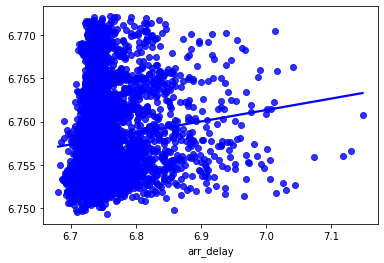

In [ ]:
sns.regplot(x=y_test, y=y_test_predict, ci=None, color="b")

In [ ]:
y_test1= regr.predict(test_data)
print(f"The predicted arrival delyas are:\n", list(y_test1))


The predicted arrival delyas are:
 [6.75810287874309, 6.759197770358625, 6.758008100734631, 6.755320275684897, 6.758254219565871, 6.757723766709252, 6.7549594730036295, 6.754256867298074, 6.76763552844156, 6.754247097672258, 6.756827807914014, 6.755811585538134, 6.75249939293245, 6.752784003170277, 6.766117769264073, 6.751565611765512, 6.75384033887911, 6.767196487610688, 6.752584401315093, 6.76779577558103]


While in the below model, we tried to increase the accuracy to 90 percent, but we are unable to test the model due to the insufficient data in test data

In [ ]:

train_data=merged_data_temp_arr[['year', 'month', 'day','carrier', 'origin', 'dest', 'distance','arr_delay',"dep_delay","air_time"]]
train_data.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:

y=train_data.pop('arr_delay')
X=train_data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))
## use ny_daily weather meerge and get weather conditions(merge ny_wweather_daily to both df's.)

0.9034531546809365


In [ ]:
y_test_predict = regr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


The model performance for testing set
--------------------------------------
RMSE is 0.014851569117331334
R2 score is 0.9034531546809365


In [ ]:
y_train_predict = regr.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 0.015463718184741125
R2 score is 0.9017809510666549




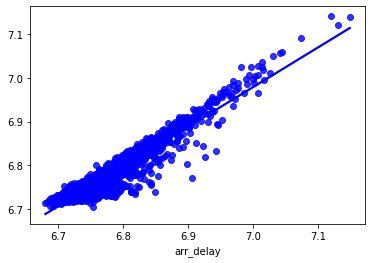

In [ ]:
sns.regplot(x=y_test, y=y_test_predict, ci=None, color="b")

Text(0, 0.5, 'Prediction')

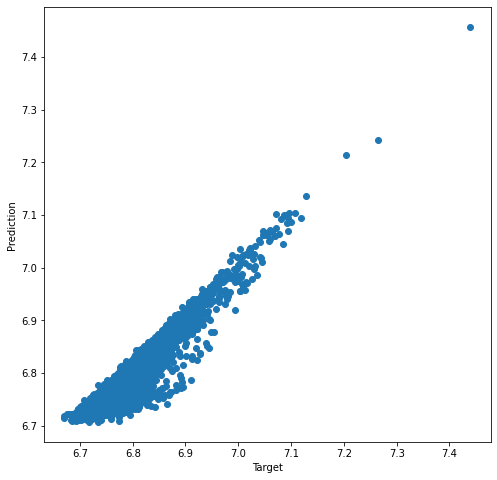

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_train,y_train_predict)
plt.xlabel('Target')
plt.ylabel('Prediction')


In [ ]:
test_data = test_data.replace(carriers)
test_data = test_data.replace(origins)
test_data = test_data.replace(dests)
test_data

,year,month,day,carrier,origin,dest,distance
0,2013,1,6,4,1,1,213
1,2013,1,25,3,2,2,229
2,2013,2,11,4,1,1,213
3,2013,4,14,7,2,1,214
4,2013,4,29,3,2,2,229
5,2013,5,26,4,1,1,213
6,2013,7,14,4,1,0,184
7,2013,7,16,7,2,1,214
8,2013,8,1,3,0,2,212
9,2013,9,29,7,2,1,214


# part 5

In [ ]:
# Build a logistic regression model to guess the 3 cancelled flights given in "fligts_test_data.xlsx". 
#Again, you have the full autorithy to decide what columns, what datasets (among the given datasets) to work with.
#In your report, please explain how you build the LogReg model and eloborate on its accuracy.
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
# SM stuff
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
merged_data_temp_5 = merged_data_temp_arr.copy()
test_data
#take data which has cancellations too, and make a model, logic is for cancelled flights 
#distance would be zero but in test data distance is given. so no cancelled flights.

,year,month,day,carrier,origin,dest,distance
0,2013,1,6,4,1,1,213
1,2013,1,25,3,2,2,229
2,2013,2,11,4,1,1,213
3,2013,4,14,7,2,1,214
4,2013,4,29,3,2,2,229
5,2013,5,26,4,1,1,213
6,2013,7,14,4,1,0,184
7,2013,7,16,7,2,1,214
8,2013,8,1,3,0,2,212
9,2013,9,29,7,2,1,214


In [ ]:
merged_data_temp_5["cancelled"] = np.where(merged_data_temp_5["dep_time"].isna(), 1, 0)

In [ ]:
#taking two datasets to remove bias.
data_cancelled_flights = merged_data_temp_5[merged_data_temp_5["cancelled"]== 1]
data_run_flights = merged_data_temp_5[merged_data_temp_5["cancelled"] == 0]

In [ ]:
data_run_flights_final = data_run_flights.sample(n=1000)
data_run_flights_final

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,origin,dest,air_time,distance,cancelled
4825,2013,4,7,1822.0,6.739337,1927.0,6.731018,4,1,0,40.0,184,0
15461,2013,11,26,2003.0,6.768493,2137.0,6.797940,3,0,1,58.0,199,0
15565,2013,11,2,1922.0,6.739337,2027.0,6.725034,9,2,2,47.0,229,0
11820,2013,8,29,1151.0,6.762730,1258.0,6.751101,1,1,2,50.0,228,0
14543,2013,10,22,1924.0,6.741701,2038.0,6.733402,3,2,2,48.0,229,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2013,1,18,1744.0,6.741701,1906.0,6.744059,1,1,2,52.0,228,0
913,2013,1,23,1252.0,6.739337,1413.0,6.753438,7,2,1,46.0,214,0
16006,2013,11,29,1446.0,6.744059,1629.0,6.752270,0,1,2,49.0,228,0
10068,2013,7,9,1008.0,6.759255,1115.0,6.747587,3,1,2,43.0,228,0


In [ ]:
new_dataset = pd.concat([data_run_flights_final, data_cancelled_flights])
new_dataset

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,origin,dest,air_time,distance,cancelled
11122,2013,8,21,1320.0,6.771936,1421.0,6.752270,7,2,1,43.0,214,0
16793,2013,12,1,1659.0,6.763885,1850.0,6.792344,9,2,2,83.0,229,0
12135,2013,9,6,1451.0,6.744059,1601.0,6.706862,0,1,1,45.0,213,0
11502,2013,8,8,958.0,6.747587,1145.0,6.782192,3,1,2,49.0,228,0
11871,2013,9,5,825.0,6.742881,930.0,6.726233,0,1,0,37.0,184,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17115,2013,12,26,NaN,NaN,NaN,NaN,3,1,2,NaN,228,1
17116,2013,12,26,NaN,NaN,NaN,NaN,3,2,2,NaN,229,1
17147,2013,12,29,NaN,NaN,NaN,NaN,3,2,2,NaN,229,1
17157,2013,12,30,NaN,NaN,NaN,NaN,3,1,2,NaN,228,1


In [ ]:
new_dataset.describe()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,origin,dest,air_time,distance,cancelled
count,1939.0,1939.000000,1939.000000,1000.000000,1000.000000,998.000000,997.000000,1939.000000,1939.000000,1939.000000,997.000000,1939.000000,1939.000000
mean,2013.0,6.007736,15.613203,1372.919000,6.760646,1484.628257,6.754882,3.889118,1.171222,1.242393,45.865597,212.559567,0.484270
std,0.0,3.405429,8.725782,484.861301,0.042916,494.620026,0.047484,2.491177,0.745525,0.621292,6.939063,14.421595,0.499881
min,2013.0,1.000000,1.000000,548.000000,6.732211,6.000000,6.689599,0.000000,0.000000,0.000000,32.000000,169.000000,0.000000
25%,2013.0,3.000000,8.000000,955.000000,6.741701,1105.000000,6.729824,3.000000,1.000000,1.000000,41.000000,212.000000,0.000000
50%,2013.0,6.000000,15.000000,1429.000000,6.745236,1536.000000,6.741701,3.000000,1.000000,1.000000,45.000000,214.000000,0.000000
75%,2013.0,9.000000,23.000000,1810.250000,6.758095,1916.750000,6.761573,7.000000,2.000000,2.000000,49.000000,228.000000,1.000000
max,2013.0,12.000000,31.000000,2315.000000,7.123673,2355.000000,7.148346,9.000000,2.000000,2.000000,100.000000,229.000000,1.000000


In [ ]:
new_dataset.corr()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,origin,dest,air_time,distance,cancelled
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,-0.039821,-0.030635,-0.053165,-0.022775,-0.061599,-0.003609,0.089717,0.097154,-0.015165,0.139282,-0.059187
day,NaN,-0.039821,1.000000,-0.002974,-0.002501,0.003478,0.019720,-0.022721,0.009631,-0.002018,0.014243,0.006613,-0.053683
dep_time,NaN,-0.030635,-0.002974,1.000000,0.291325,0.900642,0.241566,-0.039031,0.018830,-0.095661,-0.031179,-0.051450,NaN
dep_delay,NaN,-0.053165,-0.002501,0.291325,1.000000,0.181051,0.925757,-0.111487,-0.097804,0.030359,0.042073,-0.008629,NaN
arr_time,NaN,-0.022775,0.003478,0.900642,0.181051,1.000000,0.166384,-0.007709,0.074215,-0.066411,0.023968,-0.009115,NaN
arr_delay,NaN,-0.061599,0.019720,0.241566,0.925757,0.166384,1.000000,-0.009551,-0.049886,0.021222,0.232461,0.000253,NaN
carrier,NaN,-0.003609,-0.022721,-0.039031,-0.111487,-0.007709,-0.009551,1.000000,0.509766,-0.133649,0.062188,0.032090,0.005850
origin,NaN,0.089717,0.009631,0.018830,-0.097804,0.074215,-0.049886,0.509766,1.000000,0.110872,0.213434,0.489531,0.025230
dest,NaN,0.097154,-0.002018,-0.095661,0.030359,-0.066411,0.021222,-0.133649,0.110872,1.000000,0.307637,0.872526,-0.009316


In [ ]:
x = new_dataset.loc[:,['year','month','day','carrier','origin','dest','distance']].values
y = new_dataset.loc[:,'cancelled'].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.5180412371134021

In [ ]:
y_predict = logreg.predict(X_test)
cm1 = confusion_matrix(y_test,y_predict)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)


Confusion Matrix : 
 [[127  68]
 [119  74]]
Accuracy :  0.5180412371134021
Sensitivity :  0.6512820512820513
Specificity :  0.38341968911917096


In [ ]:
ytest_pred_log= logreg.predict(test_data)

print(f"The predtions for cancellations are:\n", ytest_pred_log)

The predtions for cancellations are:
 [1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
